Klasterių skaičius: 3
Atributai: ('fixed acidity', 'volatile acidity')
Inercija: 697.80
Silueto koeficientas: 0.50


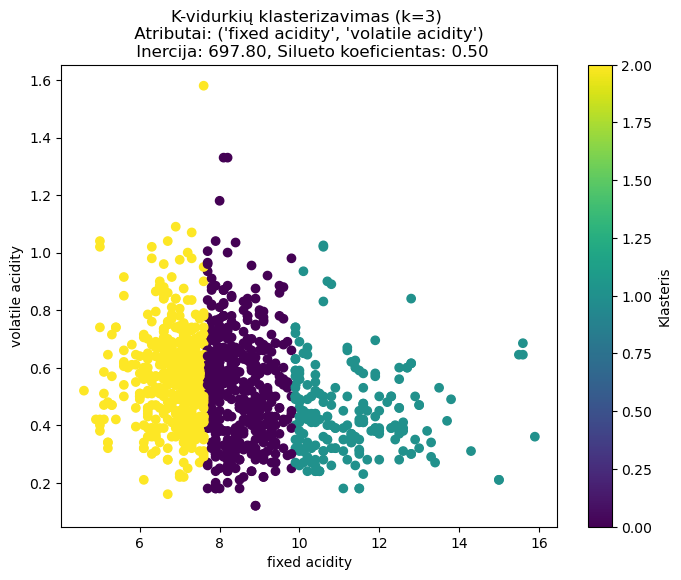

Atributai: ('residual sugar', 'chlorides')
Inercija: 522.69
Silueto koeficientas: 0.59


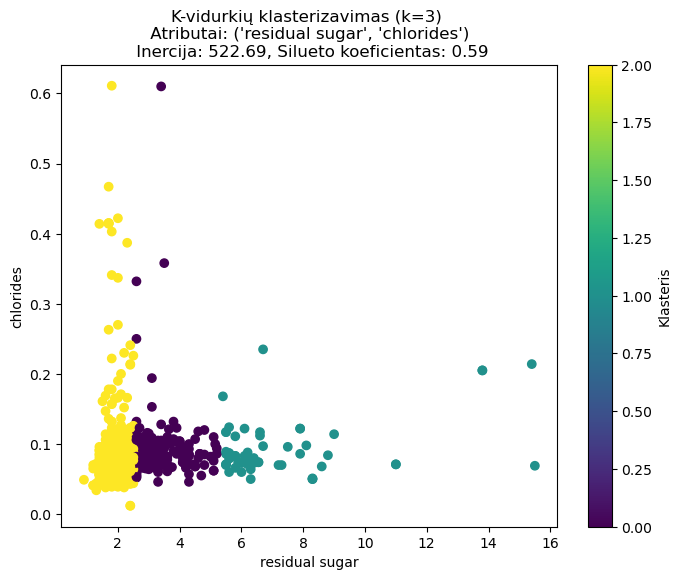

Atributai: ('total sulfur dioxide', 'density')
Inercija: 215718.28
Silueto koeficientas: 0.60


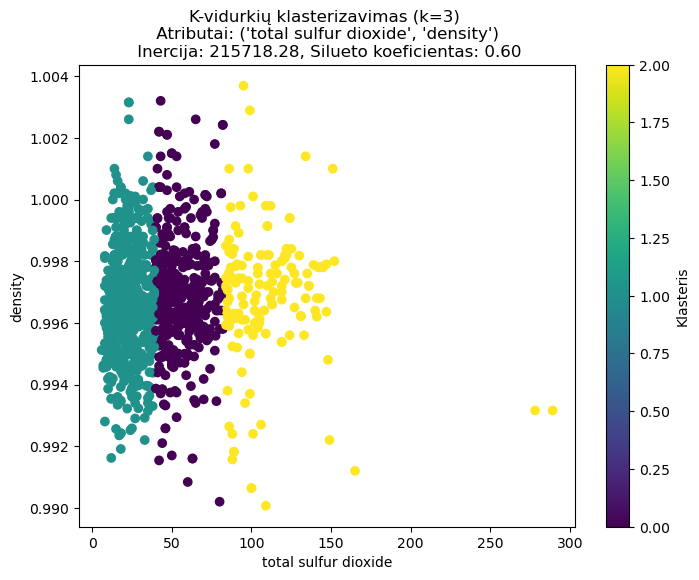

Atributai: ('alcohol', 'free sulfur dioxide')
Inercija: 21978.52
Silueto koeficientas: 0.55


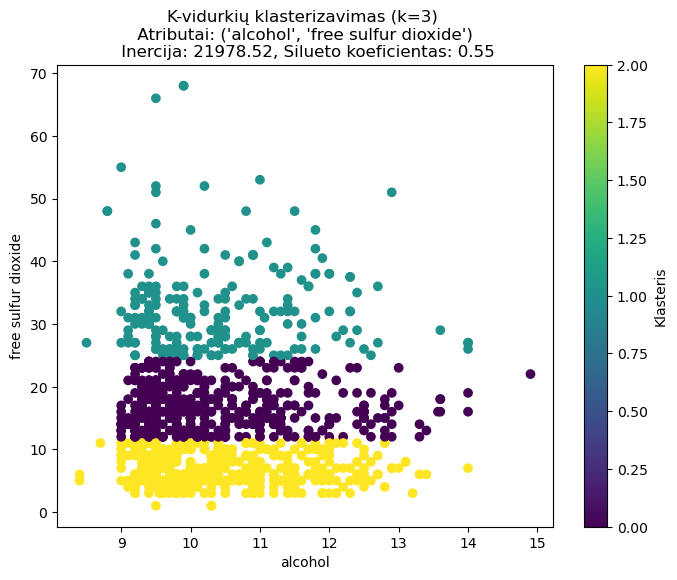

Klasterių skaičius: 4
Atributai: ('fixed acidity', 'volatile acidity')
Inercija: 437.33
Silueto koeficientas: 0.48


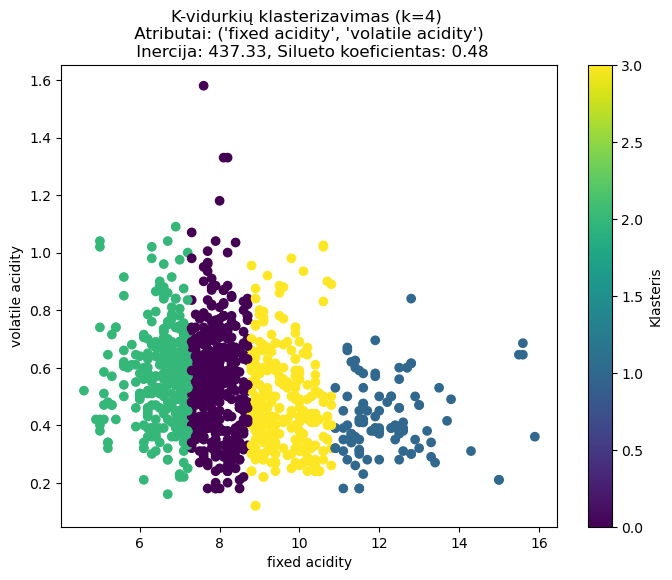

Atributai: ('residual sugar', 'chlorides')
Inercija: 281.99
Silueto koeficientas: 0.57


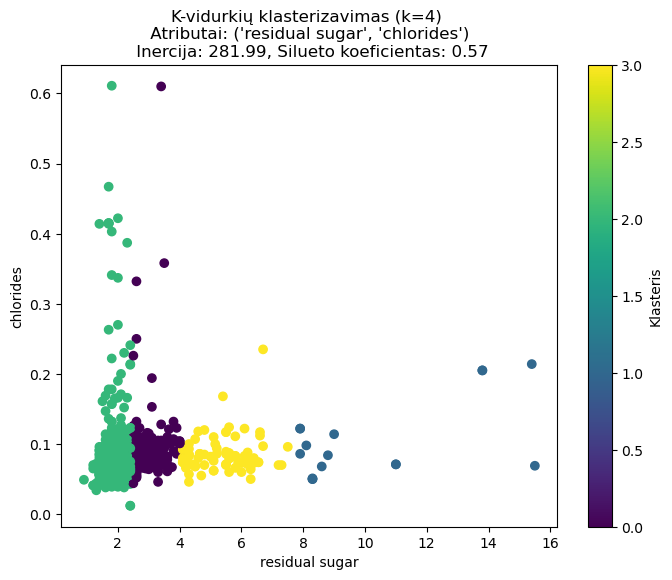

Atributai: ('total sulfur dioxide', 'density')
Inercija: 153966.40
Silueto koeficientas: 0.61


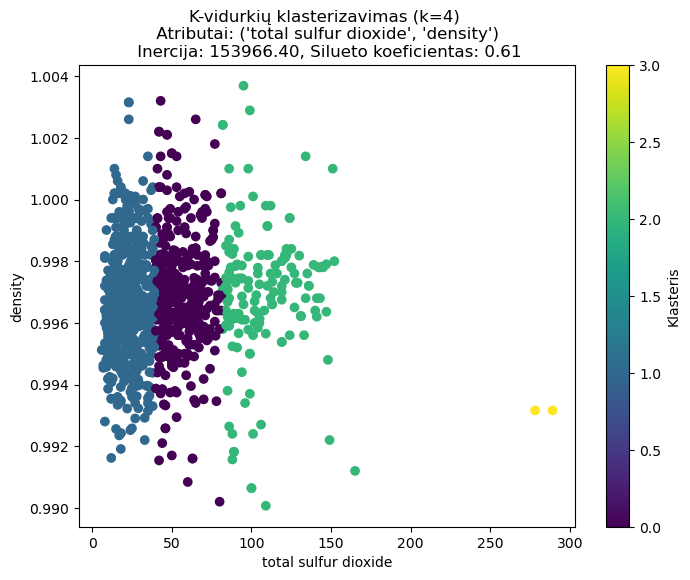

Atributai: ('alcohol', 'free sulfur dioxide')
Inercija: 13921.13
Silueto koeficientas: 0.53


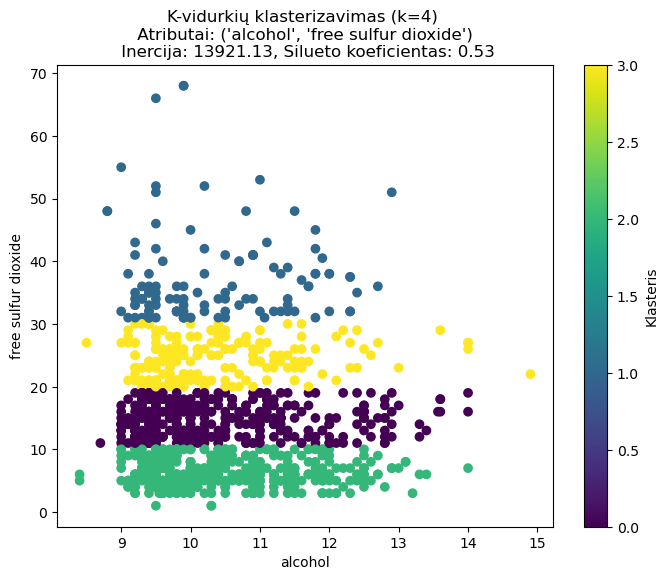

Klasterių skaičius: 5
Atributai: ('fixed acidity', 'volatile acidity')
Inercija: 315.41
Silueto koeficientas: 0.47


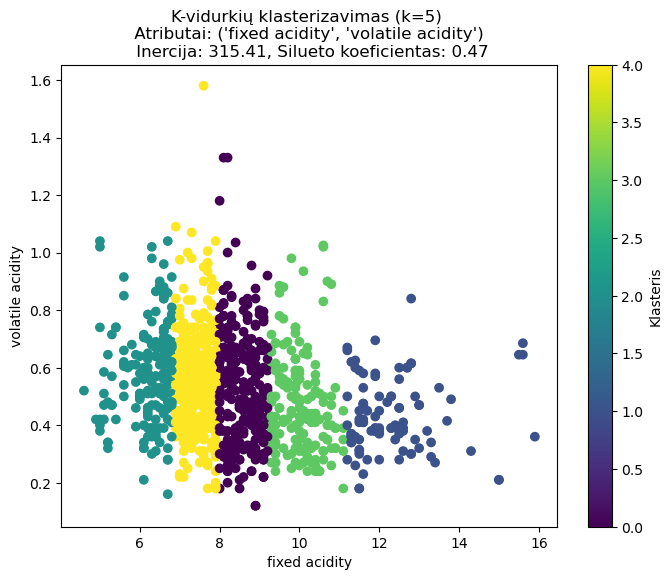

Atributai: ('residual sugar', 'chlorides')
Inercija: 171.13
Silueto koeficientas: 0.57


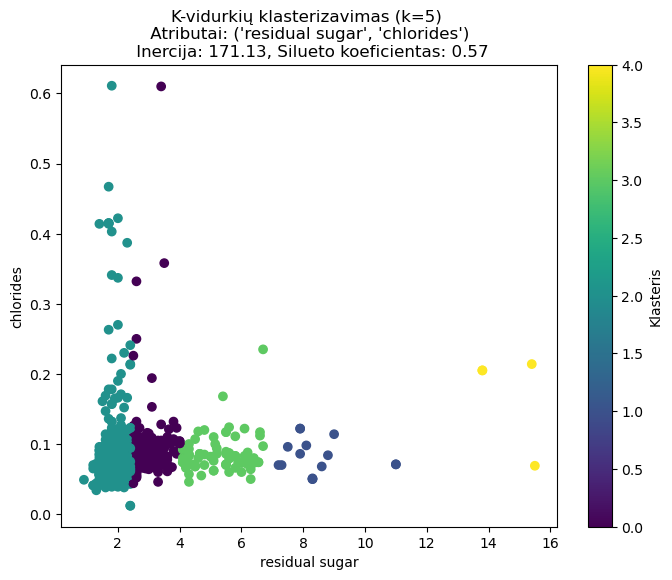

Atributai: ('total sulfur dioxide', 'density')
Inercija: 91754.43
Silueto koeficientas: 0.59


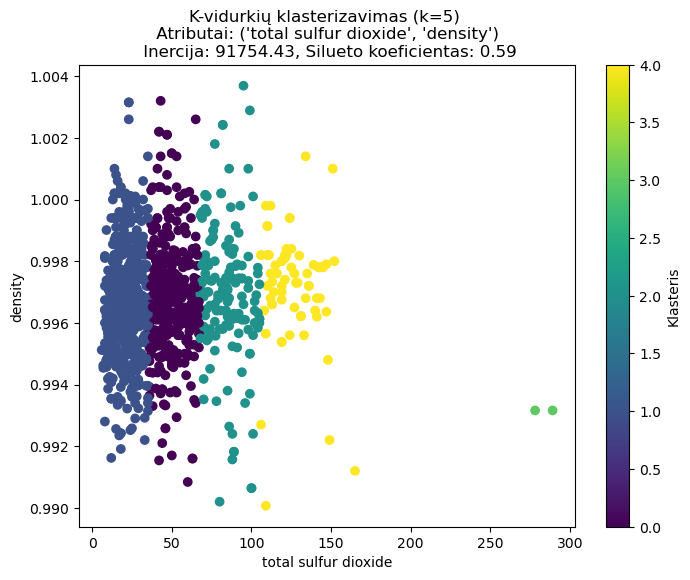

Atributai: ('alcohol', 'free sulfur dioxide')
Inercija: 9481.89
Silueto koeficientas: 0.53


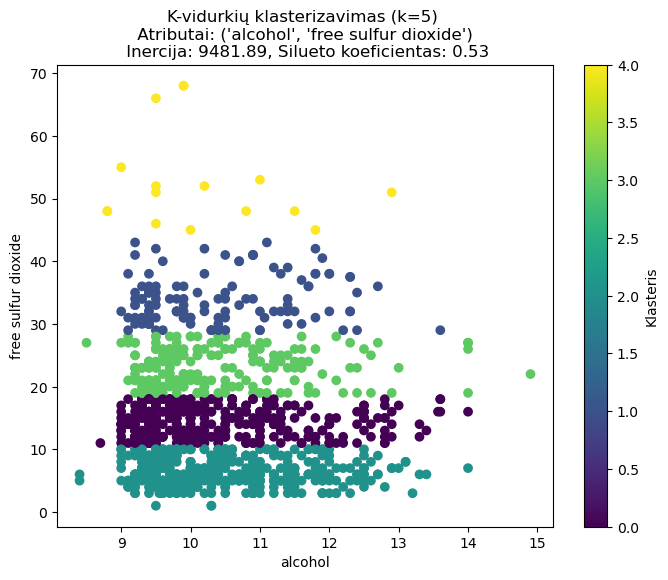

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from minisom import MiniSom

FILE = "WineQT.csv"
NUMERICAL = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide",
             "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]
CATEGORICAL = ["quality"]

data = pd.read_csv(FILE)
data = data.drop(columns=['Id'])

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[NUMERICAL])

cluster_numbers = [3, 4, 5]


attributes_combinations = [
    ("fixed acidity", "volatile acidity"),
    ("residual sugar", "chlorides"),
    ("total sulfur dioxide", "density"),
    ("alcohol", "free sulfur dioxide")
]

def perform_kmeans(data, attributes, n_clusters):
    X = data[list(attributes)].values
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X)
    
    inertia = kmeans.inertia_
    silhouette_avg = silhouette_score(X, labels)
    
    return labels, inertia, silhouette_avg

for n_clusters in cluster_numbers:
    print(f"Klasterių skaičius: {n_clusters}")
    
    for attributes in attributes_combinations:
        labels, inertia, silhouette_avg = perform_kmeans(data, attributes, n_clusters)
        
        print(f"Atributai: {attributes}")
        print(f"Inercija: {inertia:.2f}")
        print(f"Silueto koeficientas: {silhouette_avg:.2f}")
        
        X = data[list(attributes)].values
        
        plt.figure(figsize=(8, 6))
        plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
        plt.xlabel(attributes[0])
        plt.ylabel(attributes[1])
        plt.title(f"K-vidurkių klasterizavimas (k={n_clusters}) \n Atributai: {attributes} \n Inercija: {inertia:.2f}, Silueto koeficientas: {silhouette_avg:.2f}")
        plt.colorbar(label='Klasteris')
        plt.show()
